In [64]:
import matplotlib.pyplot as mp

import pandas

import numpy

In [19]:
# solarized colors
solar_base03    = '#002b36' # darkest gray
solar_base02    = '#073642'
solar_base01    = '#586e75'
solar_base00    = '#657b83'
solar_base0     = '#839496' # light gray
solar_base1     = '#93a1a1' # lightest gray
solar_base2     = '#eee8d5' # dark white
solar_base3     = '#fdf6e3' # light white
solar_yellow    = '#b58900'
solar_orange    = '#cb4b16'
solar_red       = '#dc322f'
solar_magenta   = '#d33682'
solar_violet    = '#6c71c4'
solar_blue      = '#268bd2'
solar_cyan      = '#2aa198'
solar_green     = '#859900'

# EIA natural gas consumption by end use data

In [11]:
excel_file = pandas.ExcelFile('NG_CONS_SUM_DCU_NUS_M.xls')
natgas_df = pandas.read_excel(excel_file, 'Data 1', header=2)

In [12]:
natgas_df

,Date,U.S. Natural Gas Total Consumption (MMcf),U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
0,1973-01-15,NaN,NaN,NaN,NaN,843900,392315,NaN,NaN,NaN
1,1973-02-15,NaN,NaN,NaN,NaN,747331,394281,NaN,NaN,NaN
2,1973-03-15,NaN,NaN,NaN,NaN,648504,310799,NaN,NaN,NaN
3,1973-04-15,NaN,NaN,NaN,NaN,465867,231943,NaN,NaN,NaN
4,1973-05-15,NaN,NaN,NaN,NaN,326313,174258,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
580,2021-05-15,2094489.0,156044.0,69223.0,1869222.0,216003,181734,651217.0,4515.0,815753.0
581,2021-06-15,2212302.0,151351.0,73117.0,1987835.0,127979,141435,631993.0,4369.0,1082059.0
582,2021-07-15,2381531.0,157076.0,78710.0,2145746.0,111676,141673,656899.0,4515.0,1230983.0
583,2021-08-15,2405867.0,158379.0,79514.0,2167974.0,105451,140186,662008.0,4515.0,1255814.0


<AxesSubplot:>

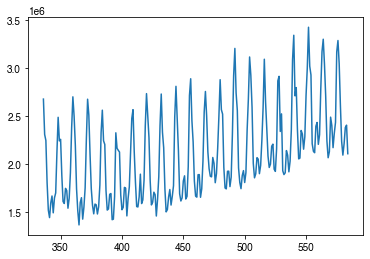

In [13]:
natgas_df['U.S. Natural Gas Total Consumption (MMcf)'].plot()

In [32]:
dates = natgas_df['Date'].values
total_cons = natgas_df['U.S. Natural Gas Total Consumption (MMcf)'].values
pipe_distro = natgas_df['U.S. Natural Gas Pipeline & Distribution Use (MMcf)'].values

In [82]:
total_cons_runmean = natgas_df['U.S. Natural Gas Total Consumption (MMcf)'].rolling(window=12, center=True).mean()
pipe_distro_runmean = natgas_df['U.S. Natural Gas Pipeline & Distribution Use (MMcf)'].rolling(window=12, center=True).mean()

Text(0.5, 1.0, 'US natural gas, total consumption (MMcf)')

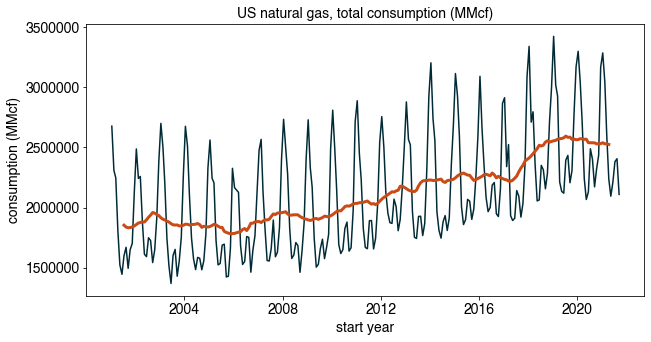

In [83]:
font_size = 14

fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(dates, total_cons, color=solar_base03)

ax.plot(dates, total_cons_runmean, color=solar_orange, linewidth=3)

ax.tick_params(labelsize=font_size)
ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('consumption (MMcf)', size=font_size)

#ax.ticklabel_format(useOffset=False, axis='y')
ax.ticklabel_format(style='plain', axis='y')

#ax.set_xlim(1899.5, 2021.5)
#ax.set_ylim(0, 35000)

# ax.plot(pipes_started_sum.index.values[-7:-3], pipes_started_sum.values[-7:-3],
#        c=solar_orange, lw=5)

ax.set_title('US natural gas, total consumption (MMcf)', size=font_size)

Text(0.5, 1.0, 'US natural gas and pipeline distruction use (MMcf)')

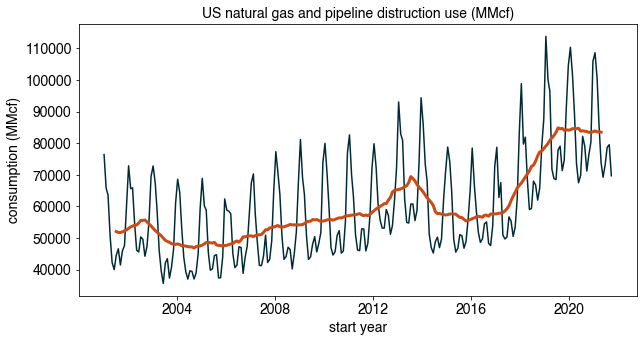

In [84]:
font_size = 14

fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(dates, pipe_distro, color=solar_base03)

ax.plot(dates, pipe_distro_runmean, color=solar_orange, linewidth=3)

ax.tick_params(labelsize=font_size)
ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('consumption (MMcf)', size=font_size)

#ax.ticklabel_format(useOffset=False, axis='y')
ax.ticklabel_format(style='plain', axis='y')

#ax.set_xlim(1899.5, 2021.5)
#ax.set_ylim(0, 35000)

# ax.plot(pipes_started_sum.index.values[-7:-3], pipes_started_sum.values[-7:-3],
#        c=solar_orange, lw=5)

ax.set_title('US natural gas and pipeline distruction use (MMcf)', size=font_size)

# our world in data natgas for globe

In [89]:
owid_df = pandas.read_excel('owid-energy-data.xlsx', header=0)

In [90]:
gas_consumption_series = owid_df.groupby('year')['gas_consumption'].sum()

In [91]:
gas_consumption_datetime_years = [numpy.datetime64(str(i)+'-06') for i in gas_consumption_series.index]

Text(0.5, 1.0, 'natural gas consumption (USA and global)')

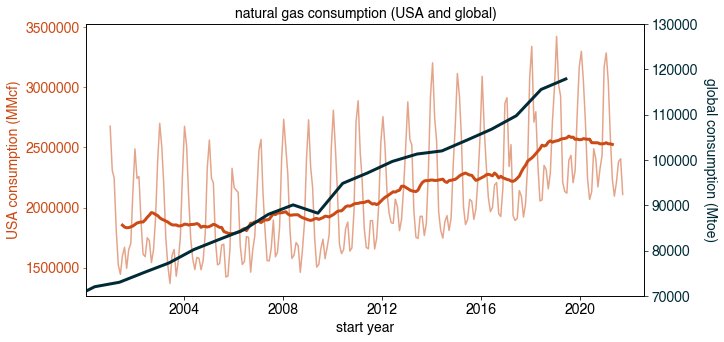

In [134]:
font_size = 14

fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(dates, total_cons, color=solar_orange, alpha=0.5)

ax.plot(dates, total_cons_runmean, color=solar_orange, linewidth=3)

ax.tick_params(labelsize=font_size)
ax.tick_params(colors=solar_orange, axis='y')
ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('USA consumption (MMcf)', size=font_size, color=solar_orange)

#ax.ticklabel_format(useOffset=False, axis='y')
ax.ticklabel_format(style='plain', axis='y')

ax.set_xlim(numpy.datetime64('2000-02'), numpy.datetime64('2022-08'))

ax2 = ax.twinx()
ax2.plot(gas_consumption_datetime_years[:-1], gas_consumption_series.values[:-1],
        color=solar_base03, lw=3)
ax2.set_ylim(70000,130000)
ax2.tick_params(labelsize=font_size, colors=solar_base03)
ax2.set_ylabel('global consumption (Mtoe)', size=font_size, rotation=-90, labelpad=19, color=solar_base03)

#ax

ax.set_title('natural gas consumption (USA and global)', size=font_size)

In [59]:
ax.get_xlim()

(10959.6, 19262.4)